A moving window function, also known as a rolling window function, is a way to compute a function over a fixed-width sliding window of data points in a time series. It is a common technique used in time series analysis and is particularly useful for smoothing noisy data, detecting trends and patterns, and calculating rolling statistics.



The basic idea of a moving window function is to define a window of a fixed size that moves along the time series and computes a function over the data within that window.

In [1]:
import pandas as pd

# Create a time series
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ts = pd.Series(data)

# Compute a rolling average with a window of size 3
rolling_mean = ts.rolling(window=3).mean()

# Print the results
print(rolling_mean)


0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64


 The first two values in the rolling mean are NaN, since there is not enough data to compute a rolling average, but the subsequent values are the rolling averages over the window of size 3.



**1. Window size:** The size of the window used in a moving window function is an important parameter that can affect the results. A larger window size will give a smoother rolling average, but may also mask shorter-term fluctuations in the data. A smaller window size will capture shorter-term fluctuations but may be more susceptible to noise in the data.

**2. Centering:** By default, the rolling() function in Pandas uses a trailing window, which means that **the window is anchored to the right end of the time series.** However, it's also possible to use a centered window, which computes the function over a window centered at each time step. This can be done by passing the argument "center=True" to the rolling() function.

**3.Other functions:** In addition to computing rolling averages, other functions can be applied to the data within the moving window, such as computing the minimum, maximum, or standard deviation. The rolling() function in Pandas can be used with any function that takes a one-dimensional array as input.

**4.Multiple windows:** It's also possible to compute moving window functions with multiple window sizes, which can capture both short-term and long-term trends in the data. This can be done by chaining multiple rolling() functions together, each with a different window size.

In [2]:
import pandas as pd

# Create a time series
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ts = pd.Series(data)

# Compute rolling minimum and maximum with window sizes of 3 and 5
rolling_min = ts.rolling(window=3).min()
rolling_max = ts.rolling(window=5).max()

# Print the results
print("Rolling minimum:")
print(rolling_min)
print("Rolling maximum:")
print(rolling_max)


Rolling minimum:
0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    6.0
8    7.0
9    8.0
dtype: float64
Rolling maximum:
0     NaN
1     NaN
2     NaN
3     NaN
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
dtype: float64


Moving window functions are widely used in time series analysis for a variety of purposes, such as:

**1.Trend estimation:** A moving window function can be used to estimate the trend in a time series by computing a rolling average or other function over a fixed-size window. This can be useful for identifying long-term patterns in the data and removing short-term noise.

**2.Smoothing:** Moving window functions can be used to smooth out noisy data by computing a rolling average or other function over a window. This can help to identify underlying trends in the data that may be obscured by noise.

**3.Seasonality detection:** A moving window function can be used to identify seasonal patterns in a time series by computing a rolling average over a fixed-size window that corresponds to the length of a seasonal cycle.

**4.Outlier detection:** Moving window functions can be used to detect outliers in a time series by computing a rolling median or other robust statistic that is less sensitive to extreme values than the mean.

**5.Forecasting:** Moving window functions can be used to compute rolling statistics such as the mean or standard deviation, which can be used as inputs to time series forecasting models.

In [8]:
import pandas as pd
df = pd.read_csv("AAPL.csv",index_col=0)

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-28,172.169998,175.729996,172.000000,175.600006,174.542679,90371900
2022-03-29,176.690002,179.009995,176.339996,178.960007,177.882446,100589400
2022-03-30,178.550003,179.610001,176.699997,177.770004,176.699615,92633200
2022-03-31,177.839996,178.029999,174.399994,174.610001,173.558640,103049300
2022-04-01,174.029999,174.880005,171.940002,174.309998,173.260437,78751300
...,...,...,...,...,...,...
2023-03-22,159.300003,162.139999,157.809998,157.830002,157.830002,75701800
2023-03-23,158.830002,161.550003,157.679993,158.929993,158.929993,67622100
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500


In [26]:
roll = df.Open.rolling(window=20,min_periods=10).mean()

In [27]:
roll

Date
2022-03-28           NaN
2022-03-29           NaN
2022-03-30           NaN
2022-03-31           NaN
2022-04-01           NaN
                 ...    
2023-03-22    151.274501
2023-03-23    151.711501
2023-03-24    152.299001
2023-03-27    152.910501
2023-03-28    153.456501
Name: Open, Length: 252, dtype: float64

<AxesSubplot:xlabel='Date'>

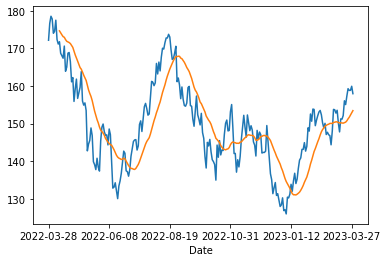

In [28]:
df.Open.plot()
roll.plot()

In the Pandas rolling() function, the min_periods parameter specifies the minimum number of observations in each window required to calculate a rolling statistic.

In the code you provided, df.Open.rolling(window=20, min_periods=20).mean(), a 20-day rolling mean is calculated for the "Open" column of a Pandas DataFrame. The min_periods=20 parameter specifies that the rolling mean should only be computed if there are at least 20 non-NaN values in each window.

This parameter is useful for dealing with missing data or gaps in the time series. If there are not enough data points within a window to calculate the rolling statistic, the result will be NaN. 

# Handling NA

<AxesSubplot:xlabel='Date'>

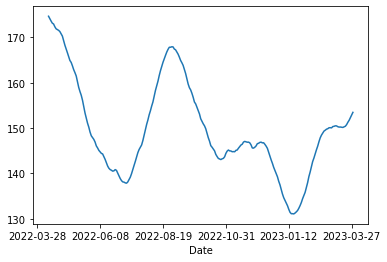

In [29]:
df.Open.rolling(window=20,min_periods=10).mean().plot()

The expression rolling(250) is similar in behavior to groupby, but instead of group‐
ing it creates an object that enables grouping over a 250-day sliding windo

 By default, Pandas rolling functions exclude any window that contains at least one NaN or null value from the calculation of the rolling statistic. This means that all values in the window must be non-NA in order for the rolling statistic to be computed.

This behavior is controlled by the min_periods parameter in the rolling function. The min_periods parameter specifies the minimum number of non-NA values required for the rolling statistic to be computed. If the number of non-NA values in a window is less than min_periods, the rolling statistic for that window will be NaN.

# Expanding window mean

In time series analysis, the expanding window mean is a statistical calculation that computes the mean of a time series over an expanding window of observations. Unlike a rolling window, which uses a fixed-size window of observations, an expanding window includes all observations up to the current time point.

To calculate the expanding window mean in Python using Pandas, you can use the expanding() function along with the mean() function. Here's an example:

In [30]:
import pandas as pd

# create a time series
ts = pd.Series([1, 2, 3, 4, 5])

# calculate the expanding window mean
exp_mean = ts.expanding().mean()

print(exp_mean)


0    1.0
1    1.5
2    2.0
3    2.5
4    3.0
dtype: float64


In [37]:
(1+2+3+4)/4

2.5

In the context of a plot method, logy=True is a parameter that is used to set the y-axis scale to logarithmic.



# Exponentially Weighted Functions

In [41]:
import pandas as pd

# create a sample time series
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ts = pd.Series(data)

# calculate the EWMA with a smoothing factor of 0.3
ewma = ts.ewm(alpha=0.3).mean()

# print the original time series and the EWMA
print(ts)
print()
print(ewma)


# smoothing factor of 0.3

0     10
1     20
2     30
3     40
4     50
5     60
6     70
7     80
8     90
9    100
dtype: int64

0    10.000000
1    15.882353
2    22.328767
3    29.305172
4    36.767877
5    44.666816
6    52.948831
7    61.560635
8    70.451211
9    79.573531
dtype: float64


# Correlation Analysis

<AxesSubplot:xlabel='Date'>

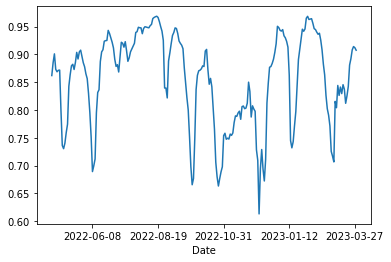

In [45]:
df.Open.rolling(20).corr(df.Close).plot()

# User-Defined Moving Window Functions


# Interquartile range 

In [46]:
import pandas as pd
import numpy as np

# Create a time series of random values
ts = pd.Series(np.random.randn(100))

# Define a function to calculate the interquartile range of a rolling window
def rolling_iqr(window):
    q1 = window.quantile(0.25)
    q3 = window.quantile(0.75)
    return q3 - q1

# Apply the custom function to a rolling window of size 20
iqr = ts.rolling(window=20).apply(rolling_iqr)

# Print the resulting time series of IQR values
print(iqr)


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
95    1.171221
96    1.171221
97    1.220258
98    1.461900
99    1.412863
Length: 100, dtype: float64


# percentileofscore 

In [48]:
import numpy as np
from scipy.stats import percentileofscore

# Create a sequence of scores
scores = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Compute the percentile rank of the score 7
percentile_rank = percentileofscore(scores, 9)

# Print the percentile rank
print(percentile_rank)


90.0


In [52]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = df.Close.rolling(250).apply(score_at_2percent)
result.plot()